In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
with open('GLB.Ts+dSST.csv') as f:
    df = pd.read_csv(f)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    137 non-null    int64  
 1   Jan     137 non-null    float64
 2   Feb     137 non-null    float64
 3   Mar     137 non-null    float64
 4   Apr     137 non-null    float64
 5   May     137 non-null    float64
 6   Jun     137 non-null    float64
 7   Jul     137 non-null    float64
 8   Aug     137 non-null    object 
 9   Sep     137 non-null    object 
 10  Oct     137 non-null    object 
 11  Nov     137 non-null    object 
 12  Dec     137 non-null    object 
 13  J-D     137 non-null    object 
 14  D-N     137 non-null    object 
 15  DJF     137 non-null    object 
 16  MAM     137 non-null    float64
 17  JJA     137 non-null    object 
 18  SON     137 non-null    object 
dtypes: float64(8), int64(1), object(10)
memory usage: 20.5+ KB


In [7]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.30,-0.21,-0.18,-0.28,-0.14,-0.29,-0.24,-0.08,-0.17,-0.16,-0.19,-0.22,-0.2,***,***,-0.20,-0.2,-0.17
1,1881,-0.09,-0.14,0.01,-0.03,-0.04,-0.28,-0.06,-0.02,-0.08,-0.19,-0.26,-0.15,-0.11,-0.12,-0.15,-0.02,-0.12,-0.18
2,1882,0.10,0.09,0.02,-0.20,-0.17,-0.25,-0.10,0.04,-0.01,-0.22,-0.21,-0.25,-0.1,-0.09,0.01,-0.12,-0.1,-0.14
3,1883,-0.33,-0.42,-0.17,-0.24,-0.25,-0.11,-0.08,-0.13,-0.18,-0.11,-0.2,-0.18,-0.2,-0.21,-0.33,-0.22,-0.11,-0.16
4,1884,-0.18,-0.11,-0.34,-0.36,-0.31,-0.38,-0.34,-0.26,-0.23,-0.22,-0.3,-0.29,-0.28,-0.27,-0.16,-0.34,-0.32,-0.25


In [8]:
monthly = df.iloc[:, :13]
for col in monthly.columns:
    monthly[col] = pd.to_numeric(monthly[col], errors='coerce')

In [9]:

monthly = monthly.set_index('Year')

In [10]:
monthly['Ann'] = monthly.mean(axis=1)

In [11]:

monthly.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ann
Year,,,,,,,,,,,,,
1880,-0.30,-0.21,-0.18,-0.28,-0.14,-0.29,-0.24,-0.08,-0.17,-0.16,-0.19,-0.22,-0.205000
1881,-0.09,-0.14,0.01,-0.03,-0.04,-0.28,-0.06,-0.02,-0.08,-0.19,-0.26,-0.15,-0.110833
1882,0.10,0.09,0.02,-0.20,-0.17,-0.25,-0.10,0.04,-0.01,-0.22,-0.21,-0.25,-0.096667
1883,-0.33,-0.42,-0.17,-0.24,-0.25,-0.11,-0.08,-0.13,-0.18,-0.11,-0.20,-0.18,-0.200000
1884,-0.18,-0.11,-0.34,-0.36,-0.31,-0.38,-0.34,-0.26,-0.23,-0.22,-0.30,-0.29,-0.276667


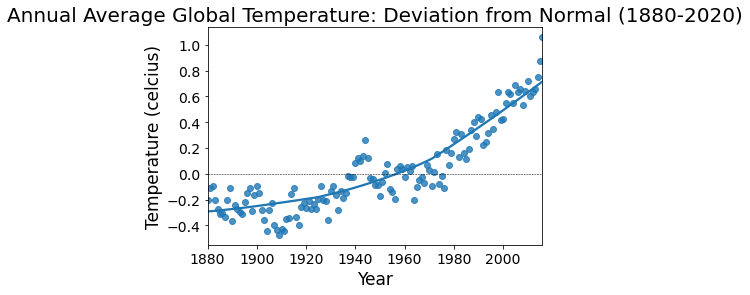

In [13]:
sns.regplot(x=monthly.index.values, y=monthly.Ann, lowess=True)
plt.title("Annual Average Global Temperature: Deviation from Normal (1880-2020)", size=20)
plt.ylabel("Temperature (celcius)", size=17)
plt.xlabel("Year", size=17)
plt.xticks(size=14)
plt.yticks(size=14)
plt.axhline(y=0, linewidth=0.5, ls='--', color='black')